In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from ydata_profiling import ProfileReport

df = pd.read_csv('WanderRush.csv')
df_modified=df.copy()

df_modified.drop(columns=['Marca temporal', '1.- Selecciona tu sexo'], inplace=True)

column_name = [
    "dedicación",
    "le_gusta_salir",
    "frecuencia_de_salida",
    "vistar_áreas_recreativas",
    "freciencia_de_visitas",
    "planear_ruta",
    "medio_de_transporte",
    "dificultad_de_llegar_al_destino",
    "compartir_su_experiencia",
    "busqueda_de_sitios",
    "red_social_más_usada",
    "encuentra_rápido_información",
    "encuentra_promociones",
    "lugares_ofrecen_información",
    "medio_compartir_experiencia",
    "le_gustaria_app",
    "como_compartir_experiencia",
    "pagar_para_acceder_lugares",
    "tipos_lugares",
    "rango_edad"

]
df_modified.columns = column_name


c:\Users\pukia\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


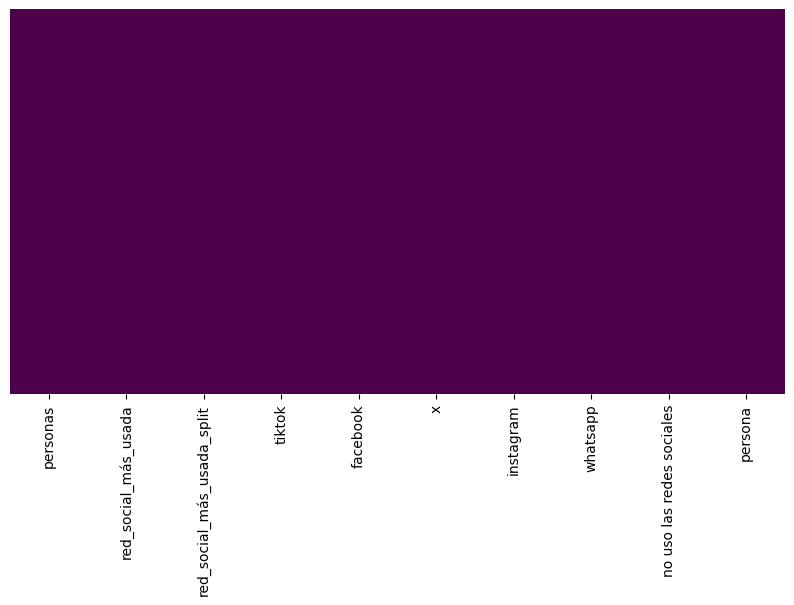

In [70]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

is_null = df_modified.isnull()

plt.figure(figsize=(10, 5))
sns.heatmap(is_null, cbar=False, cmap='BuPu_r', yticklabels=False)
plt.show()

In [2]:

frequency_likes = {
    'mucho': 5,
    'a veces': 4,
    'no tanto': 3,
    'poco': 2,
    'muy poco': 1
}

plan_route = {
   'siempre': 5,
   'algunas veces': 4,
   'regular': 3,
   'muy poco': 2,
   'nunca': 1
}

share_experience ={
    'si me gusta': 5,
    'a veces me gusta': 4,
    'regular': 3,
    'me gusta un poco': 2,
    'no me gusta': 1
}

promotions_place = {
    'muchas': 5,
    'a veces': 4,
    'no tanto':3,
    'pocas':2,
    'muy poco': 1
}
prices_place = {
    'muchas': 5,
    'a veces': 4,
    'no tanto':3,
    'pocas':2,
    'muy poco': 1
}

#Remplaza los valores en las columnas
df_modified['le_gusta_salir'] = df_modified['le_gusta_salir'].replace(frequency_likes)
df_modified['frecuencia_de_salida'] = df_modified['frecuencia_de_salida'].replace(frequency_likes)
df_modified['vistar_áreas_recreativas']= df_modified['vistar_áreas_recreativas'].replace(frequency_likes)
df_modified['freciencia_de_visitas']= df_modified['freciencia_de_visitas'].replace(frequency_likes)
df_modified['planear_ruta']= df_modified['planear_ruta'].replace(plan_route)
df_modified['dificultad_de_llegar_al_destino']= df_modified['dificultad_de_llegar_al_destino'].replace(frequency_likes)
df_modified['compartir_su_experiencia']= df_modified['compartir_su_experiencia'].replace(share_experience)
df_modified['encuentra_rápido_información']= df_modified['encuentra_rápido_información'].replace(frequency_likes)
df_modified['encuentra_promociones']= df_modified['encuentra_promociones'].replace(promotions_place)
df_modified['lugares_ofrecen_información']= df_modified['lugares_ofrecen_información'].replace(prices_place)

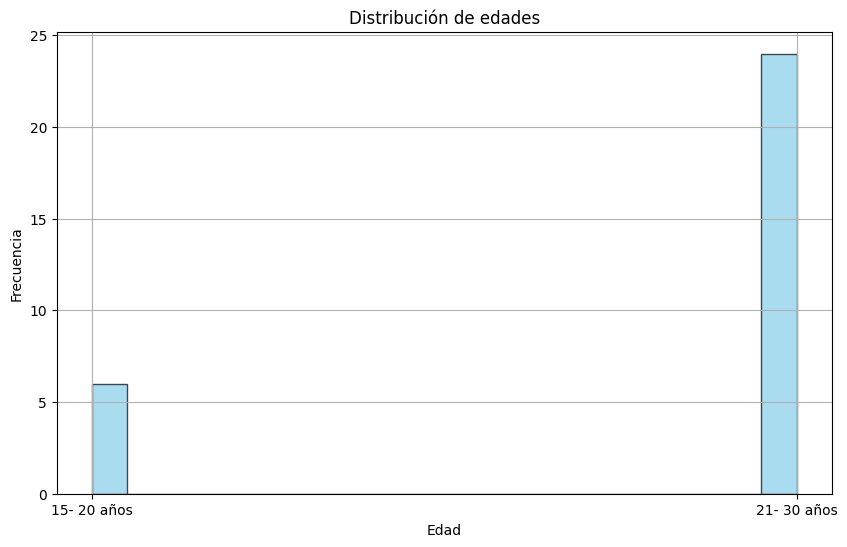

In [34]:
plt.figure(figsize=(10,6))
plt.hist(df_modified['rango_edad'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribución de edades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

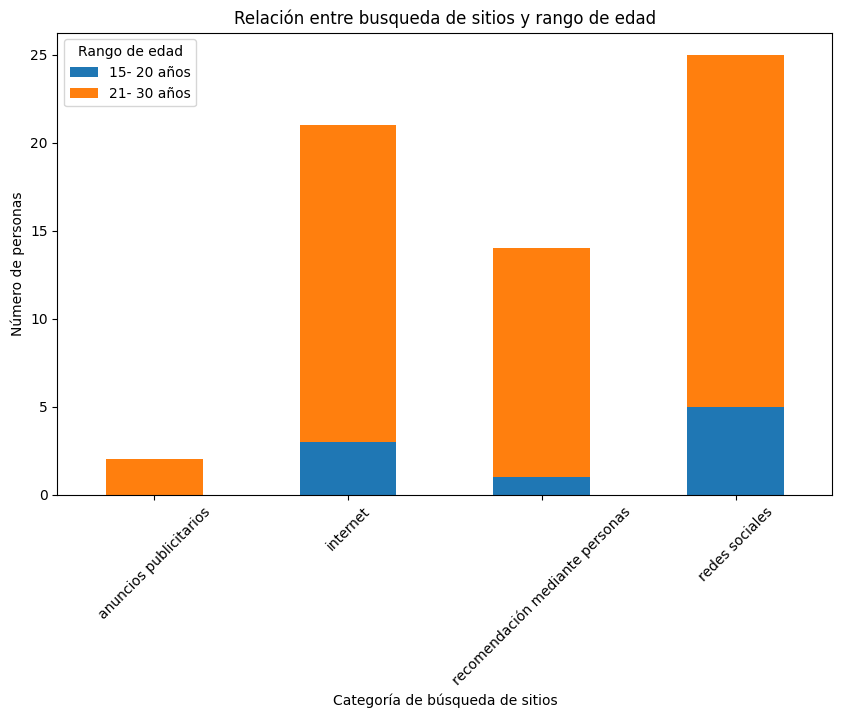

In [35]:
#1.1 con 11

df_modified['busqueda_de_sitios_split'] = df_modified['busqueda_de_sitios'].str.split(',')

df_exploded = df_modified.explode('busqueda_de_sitios_split')

df_exploded['busqueda_de_sitios_split'] = df_exploded['busqueda_de_sitios_split'].str.strip().str.lower()

categorias = ['internet', 'redes sociales', 'recomendación mediante personas', 'anuncios publicitarios']
df_filtered = df_exploded[df_exploded['busqueda_de_sitios_split'].isin(categorias)]

count_data = df_filtered.groupby(['busqueda_de_sitios_split', 'rango_edad']).size().reset_index(name='count')

pivot_data = count_data.pivot(index='busqueda_de_sitios_split', columns='rango_edad', values='count').fillna(0)
pivot_data.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Relación entre busqueda de sitios y rango de edad')
plt.ylabel('Número de personas')
plt.xlabel('Categoría de búsqueda de sitios')
plt.xticks(rotation=45)
plt.legend(title='Rango de edad')
plt.show()



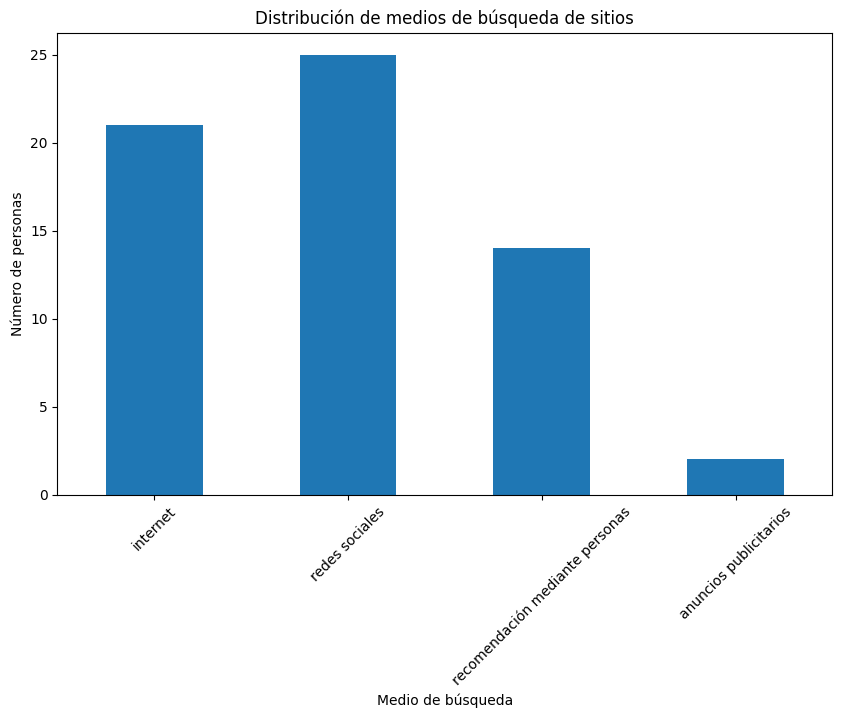

In [53]:
# imformación mediante
df_modified['busqueda_de_sitios_split'] = df_modified['busqueda_de_sitios'].str.split(',')

df_exploded = df_modified.explode('busqueda_de_sitios_split')

df_exploded['busqueda_de_sitios_split'] = df_exploded['busqueda_de_sitios_split'].str.strip().str.lower()

busqueda_categories = ['internet', 'redes sociales', 'recomendación mediante personas', 'anuncios publicitarios']

count_data = df_exploded['busqueda_de_sitios_split'].value_counts().reindex(busqueda_categories, fill_value=0)

# Graficar un gráfico de barras
plt.figure(figsize=(10, 6))
count_data.plot(kind='bar')
plt.title('Distribución de medios de búsqueda de sitios')
plt.ylabel('Número de personas')
plt.xlabel('Medio de búsqueda')
plt.xticks(rotation=45)
plt.show()




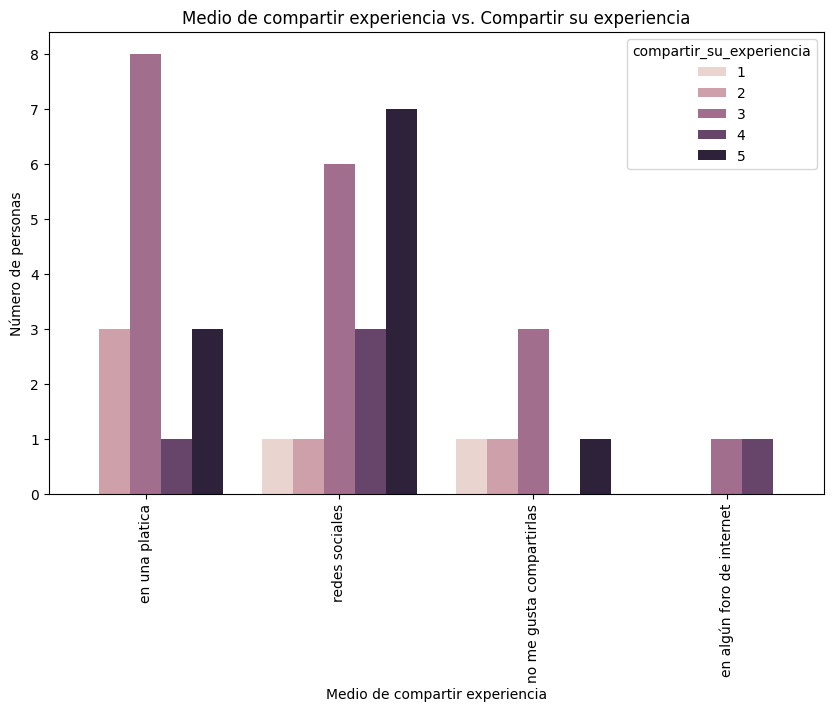

In [36]:
#10 y 16

df_modified['medio_compartir_experiencia_split'] = df_modified['medio_compartir_experiencia'].str.split(',')

df_exploded = df_modified.explode('medio_compartir_experiencia_split')

df_exploded['medio_compartir_experiencia_split'] = df_exploded['medio_compartir_experiencia_split'].str.strip().str.lower()

categorias = ['no me gusta compartirlas', 'redes sociales', 'en una platica', 'en algún foro de internet']
df_filtered = df_exploded[df_exploded['medio_compartir_experiencia_split'].isin(categorias)]

plt.figure(figsize=(10, 6))
sns.countplot(x='medio_compartir_experiencia_split', hue='compartir_su_experiencia', data=df_filtered)
plt.title('Medio de compartir experiencia vs. Compartir su experiencia')
plt.ylabel('Número de personas')
plt.xlabel('Medio de compartir experiencia')
plt.xticks(rotation=90)
plt.show()


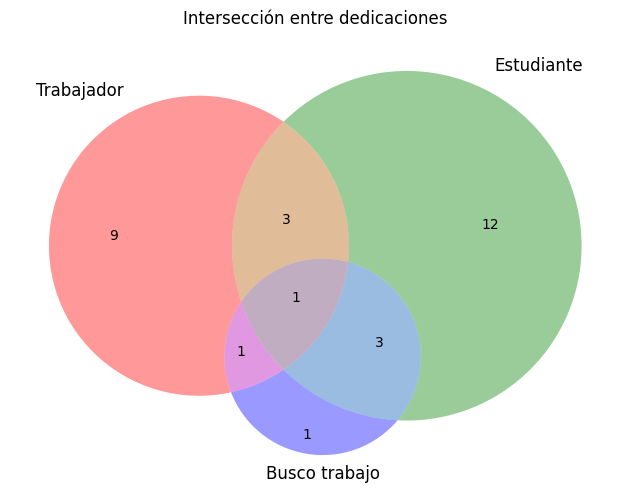

In [38]:

from matplotlib_venn import venn3
import matplotlib.pyplot as plt

# Supongamos que df_modified ya está cargado con tus datos

# Dividimos las respuestas múltiples en listas
df_modified['dedicación_split'] = df_modified['dedicación'].str.split(',')

# Limpiamos los espacios y convertimos a minúsculas
df_modified['dedicación_split'] = df_modified['dedicación_split'].apply(lambda x: [i.strip().lower() for i in x])

# Filtrar las categorías deseadas
dedicacion_categories = ['trabajador', 'estudiante', 'busco trabajo']

# Definir conjuntos para cada categoría
set_trabajador = set(df_modified[df_modified['dedicación_split'].apply(lambda x: 'trabajador' in x)].index)
set_estudiante = set(df_modified[df_modified['dedicación_split'].apply(lambda x: 'estudiante' in x)].index)
set_jubilado = set(df_modified[df_modified['dedicación_split'].apply(lambda x: 'busco trabajo' in x)].index)

# Crear el gráfico de Venn para tres conjuntos
plt.figure(figsize=(10, 6))
venn = venn3([set_trabajador, set_estudiante, set_jubilado],
             set_labels=('Trabajador', 'Estudiante', 'Busco trabajo'))
plt.title('Intersección entre dedicaciones')
plt.show()


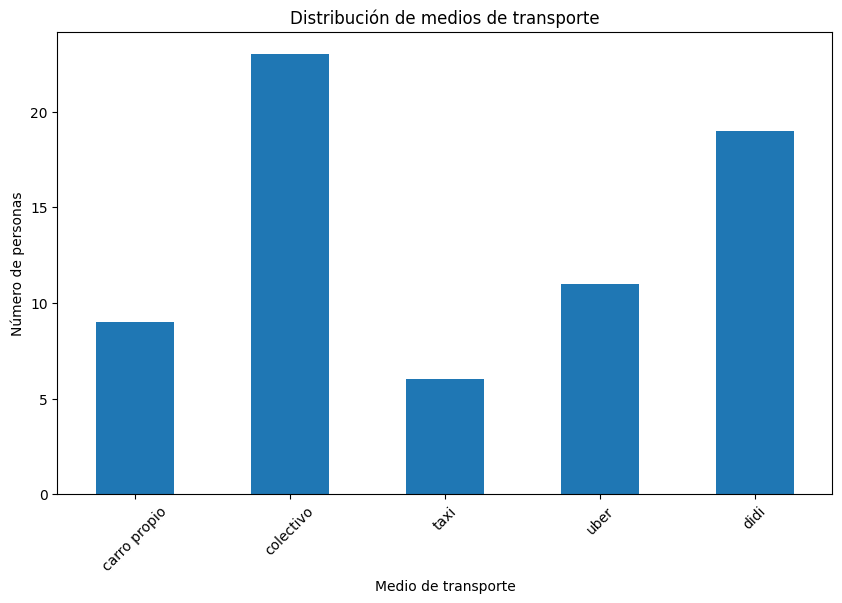

In [52]:
# Contar las ocurrencias por categoría
df_modified['medio_de_transporte_split'] = df_modified['medio_de_transporte'].str.split(',')
df_exploded = df_modified.explode('medio_de_transporte_split')

df_exploded['medio_de_transporte_split'] = df_exploded['medio_de_transporte_split'].str.strip().str.lower()
trans_categories = ['carro propio', 'colectivo', 'taxi', 'uber', 'didi']

count_data = df_exploded['medio_de_transporte_split'].value_counts().reindex(trans_categories, fill_value=0)

# Graficar un gráfico de barras
plt.figure(figsize=(10, 6))
count_data.plot(kind='bar')
plt.title('Distribución de medios de transporte')
plt.ylabel('Número de personas')
plt.xlabel('Medio de transporte')
plt.xticks(rotation=45)
plt.show()


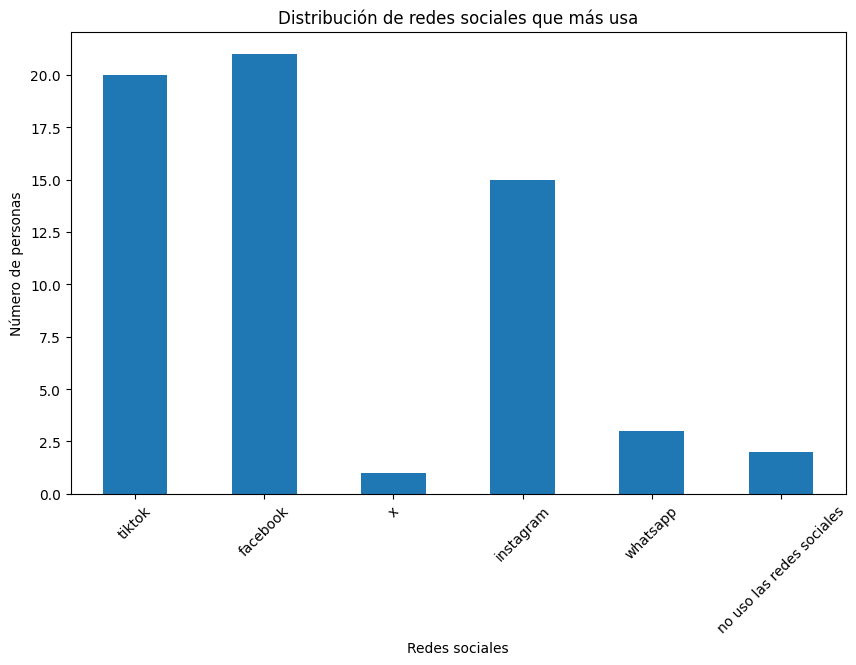

In [28]:
df_modified['red_social_más_usada_split'] = df_modified['red_social_más_usada'].str.split(',')

df_exploded = df_modified.explode('red_social_más_usada_split')

df_exploded['red_social_más_usada_split'] = df_exploded['red_social_más_usada_split'].str.strip().str.lower()

busqueda_categories = ['tiktok', 'facebook', 'x', 'instagram', 'whatsapp', 'no uso las redes sociales']

count_data = df_exploded['red_social_más_usada_split'].value_counts().reindex(busqueda_categories, fill_value=0)

# Graficar un gráfico de barras
plt.figure(figsize=(10, 6))
count_data.plot(kind='bar')
plt.title('Distribución de redes sociales que más usa')
plt.ylabel('Número de personas')
plt.xlabel('Redes sociales')
plt.xticks(rotation=45)
plt.show()

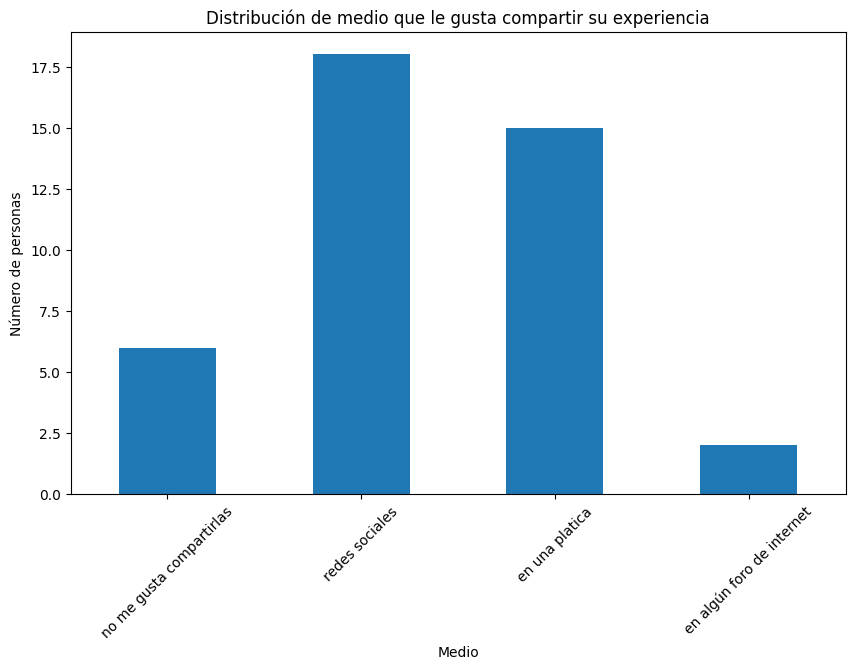

In [75]:
df_modified['medio_compartir_experiencia_split'] = df_modified['medio_compartir_experiencia'].str.split(',')

df_exploded = df_modified.explode('medio_compartir_experiencia_split')

df_exploded['medio_compartir_experiencia_split'] = df_exploded['medio_compartir_experiencia_split'].str.strip().str.lower()

medio_categories = ['no me gusta compartirlas', 'redes sociales', 'en una platica', 'en algún foro de internet']

count_data = df_exploded['medio_compartir_experiencia_split'].value_counts().reindex(medio_categories, fill_value=0)

plt.figure(figsize=(10, 6))
count_data.plot(kind='bar')
plt.title('Distribución de medio que le gusta compartir su experiencia')
plt.ylabel('Número de personas')
plt.xlabel('Medio')
plt.xticks(rotation=45)
plt.show()

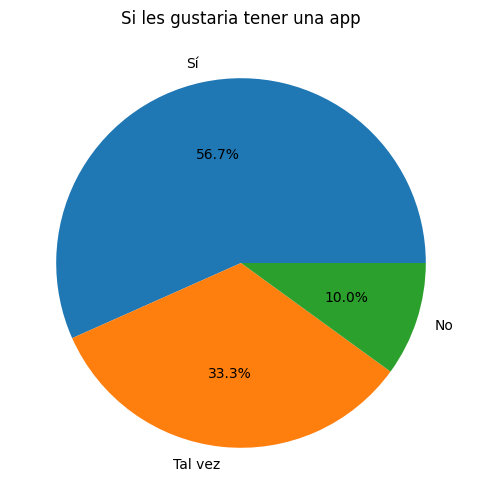

In [76]:
plt.figure(figsize=(10, 6))
df_modified['le_gustaria_app'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Si les gustaria tener una app')
plt.ylabel('') # Eliminar la etiqueta del eje y
plt.show()

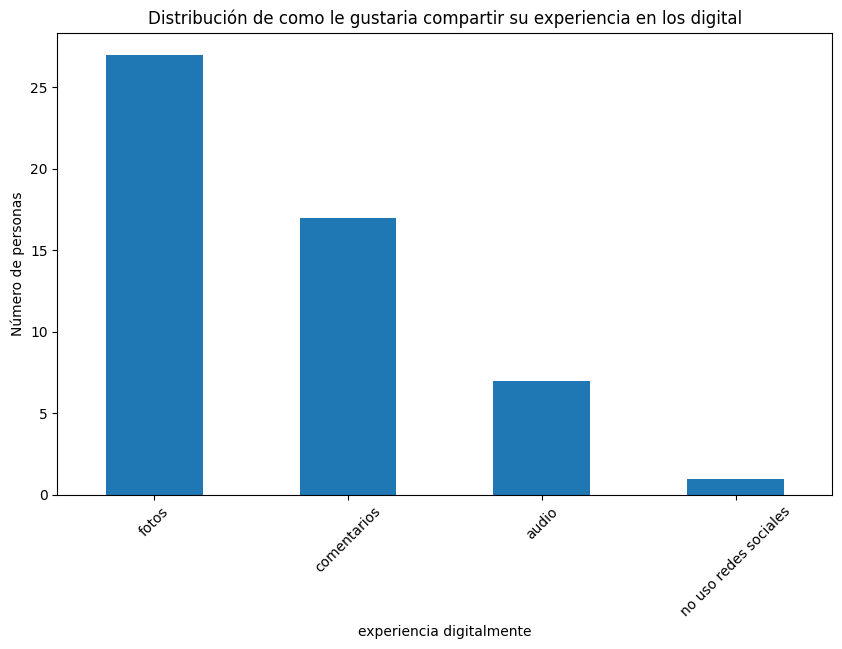

In [3]:
df_modified['como_compartir_experiencia_split'] = df_modified['como_compartir_experiencia'].str.split(',')

df_exploded = df_modified.explode('como_compartir_experiencia_split')

df_exploded['como_compartir_experiencia_split'] = df_exploded['como_compartir_experiencia_split'].str.strip().str.lower()

comp_categories = ['fotos', 'comentarios', 'audio', 'no uso redes sociales']

count_data = df_exploded['como_compartir_experiencia_split'].value_counts().reindex(comp_categories, fill_value=0)

plt.figure(figsize=(10, 6))
count_data.plot(kind='bar')
plt.title('Distribución de como le gustaria compartir su experiencia en los digital')
plt.ylabel('Número de personas')
plt.xlabel('experiencia digitalmente')
plt.xticks(rotation=45)
plt.show()

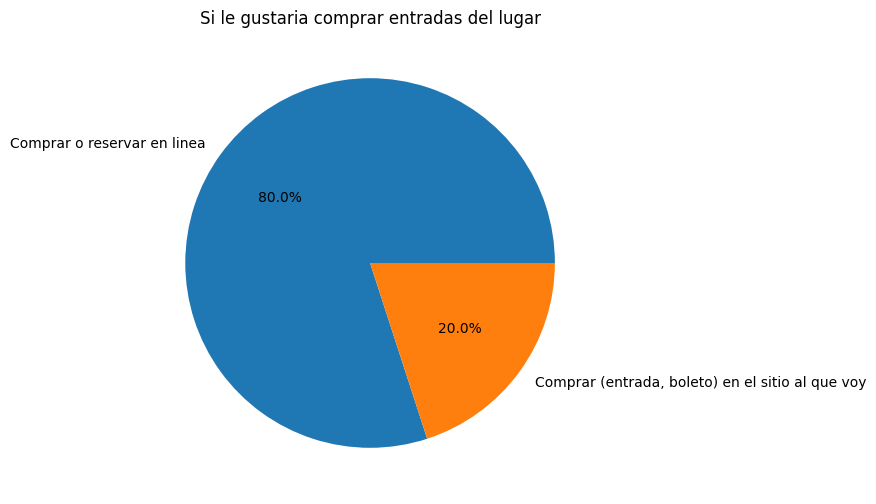

In [4]:
plt.figure(figsize=(10, 6))
df_modified['pagar_para_acceder_lugares'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Si le gustaria comprar entradas del lugar')
plt.ylabel('') # Eliminar la etiqueta del eje y
plt.show()

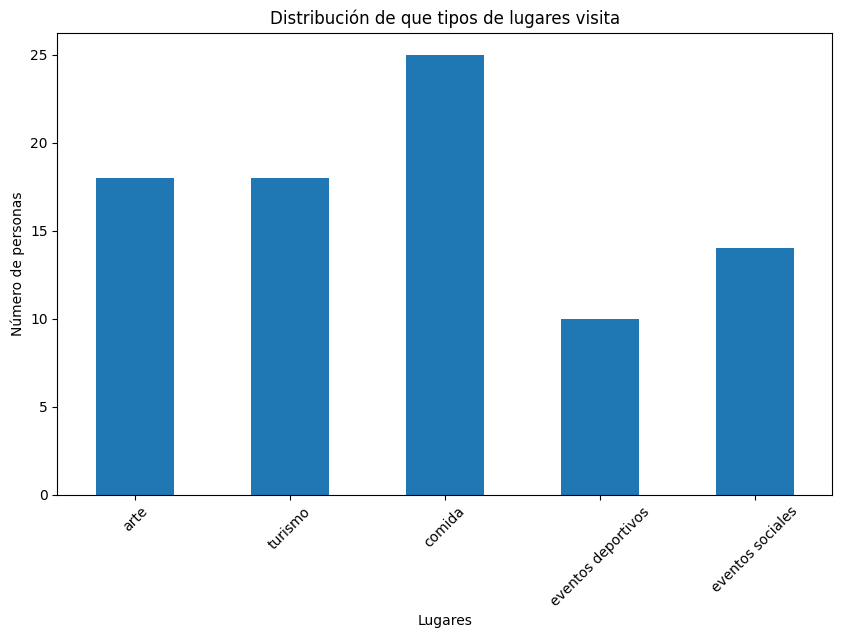

In [5]:
df_modified['tipos_lugares_split'] = df_modified['tipos_lugares'].str.split(',')

df_exploded = df_modified.explode('tipos_lugares_split')

df_exploded['tipos_lugares_split'] = df_exploded['tipos_lugares_split'].str.strip().str.lower()

comp_categories = ['arte', 'turismo', 'comida', 'eventos deportivos', 'eventos sociales']

count_data = df_exploded['tipos_lugares_split'].value_counts().reindex(comp_categories, fill_value=0)

plt.figure(figsize=(10, 6))
count_data.plot(kind='bar')
plt.title('Distribución de que tipos de lugares visita')
plt.ylabel('Número de personas')
plt.xlabel('Lugares')
plt.xticks(rotation=45)
plt.show()

In [68]:
import pandas as pd
import plotly.graph_objects as go

# Leer el archivo CSV

# Dividir las respuestas múltiples en listas
df_modified['red_social_más_usada_split'] = df_modified['red_social_más_usada'].str.split(',')

# Limpiar espacios en las respuestas
df_modified['red_social_más_usada_split'] = df_modified['red_social_más_usada_split'].apply(lambda x: [i.strip().lower() for i in x])

# Crear una lista para los nodos y un diccionario para mapear nombres a índices
nodes = ['Persona ' + str(i + 1) for i in range(len(df_modified))] + ['tiktok', 'facebook', 'x', 'instagram', 'whatsapp', 'no uso las redes sociales']
node_indices = {node: index for index, node in enumerate(nodes)}

# Crear las conexiones de origen y destino
source = []
target = []
value = []

for idx, row in df_modified.iterrows():
    for red_social in row['red_social_más_usada_split']:
        if red_social in node_indices:
            source.append(node_indices['Persona ' + str(idx + 1)])
            target.append(node_indices[red_social])
            value.append(1)  # Puedes cambiar esto para reflejar la cantidad de respuestas, si lo deseas

# Crear el diagrama de Sankey
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color='black', width=0.5),
        label=nodes,
        color='blue'
    ),
    link=dict(
        source=source,
        target=target,
        value=value
    ))])

fig.update_layout(title_text='Diagrama de Sankey: Redes Sociales que Usan las Personas', font_size=10)

# Guardar el gráfico como un archivo HTML
fig.write_html("diagrama_sankey.html")

# Abre el archivo en el navegador
import webbrowser
webbrowser.open("diagrama_sankey.html")


True

In [100]:
#3 y 4
df_modified['le_gusta_salir_split'] = df_modified['le_gusta_salir'].str.split(',')

df_exploded = df_modified.explode('le_gusta_salir_split')

df_exploded['le_gusta_salir_split'] = df_exploded['le_gusta_salir_split'].str.strip().str.lower()

categorias = [ 'mucho', 'a veces','no tanto', 'poco','muy poco']
df_filtered = df_exploded[df_exploded['le_gusta_salir_split'].isin(categorias)]

plt.figure(figsize=(10, 6))
sns.countplot(x='le_gusta_salir_split', hue='frecuencia_de_salida', data=df_filtered)
plt.title('Medio de compartir experiencia vs. Compartir su experiencia')
plt.ylabel('Número de personas')
plt.xlabel('Medio de compartir experiencia')
plt.xticks(rotation=90)
plt.show()


AttributeError: Can only use .str accessor with string values!

In [ ]:

#3 y 4
# 4 y 5
# 5 y 6 
# 2 y 8
# 12 y 14
# 16 y 17 
# 5 y 20 
#7 y 9
#13 y 15
# 19 y 20
# 18 y 16/17